# **Анализ возрастных рейтингов**

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [65]:
df = pd.read_csv("merged_clean(last_version)-2.csv",delimiter=';')

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13960 entries, 0 to 13959
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         13960 non-null  int64  
 1   page               13960 non-null  int64  
 2   title              13960 non-null  object 
 3   rating_parsed      11656 non-null  object 
 4   release_date       13931 non-null  object 
 5   platforms_parsed   13960 non-null  object 
 6   genres_parsed      13960 non-null  object 
 7   summary            13919 non-null  object 
 8   metascore          13924 non-null  float64
 9   metascore_amount   13960 non-null  int64  
 10  user_score         12428 non-null  float64
 11  user_score_amount  13960 non-null  int64  
 12  genres_api         6085 non-null   object 
 13  platforms_api      6092 non-null   object 
 14  developers         6023 non-null   object 
 15  publishers         4188 non-null   object 
dtypes: float64(2), int64(4

Посмотрим на то, игры с каким рейтингом представлены в нашей таблице.

In [67]:
ratings = df["rating_parsed"].value_counts()
ratings

,count
rating_parsed,
T,4066
E,3607
M,2231
E +10,1734
RP,16
AO,2


Text(0.5, 1.0, 'Количество игр с возрастным рейтингом')

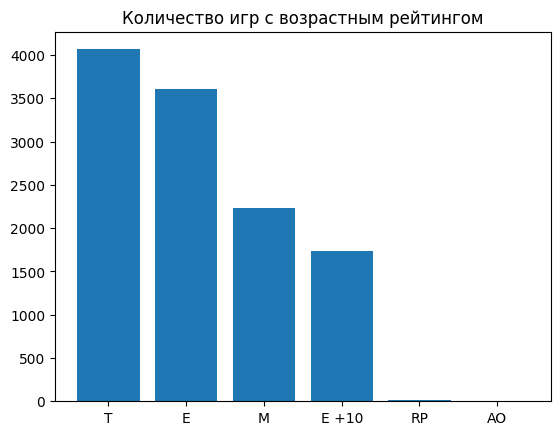

In [68]:
plt.bar(ratings.index, ratings.values)
plt.title("Количество игр с возрастным рейтингом")

Помимо того, что на некоторые игры рейтинги еще не поставили, есть рейтинг "Adults only", в котором только 2 игры.

In [69]:
df[df["rating_parsed"]=="AO"]

,Unnamed: 0,page,title,rating_parsed,release_date,platforms_parsed,genres_parsed,summary,metascore,metascore_amount,user_score,user_score_amount,genres_api,platforms_api,developers,publishers
13522,13522,563,hatred,AO,"Jun 1, 2015","PC, Nintendo Switch",Top-Down Shoot-'Em-Up,Hatred is an isometric shooter with disturbing...,43.0,48,5.0,795,"Shooter, Indie, Action",PC,Destructive Creations,Destructive Creations
13626,13626,568,seduce me,AO,"Jan 2, 2013",PC,Strategy,Having happened upon an invite to a wealthy so...,41.0,12,3.2,36,NaN,NaN,NaN,NaN


Посмотрим на описания этих игр, что в них такого особенного?

In [76]:
summary_hatred = df[df["title"]=="hatred"]["summary"].iloc[0]
summary_seduce_me = df[df["title"]=="seduce me"]["summary"].iloc[0]

In [77]:
summary_hatred

"Hatred is an isometric shooter with disturbing atmosphere of mass killing, where player takes the role of a cold blood antagonist, who is full of hatred for humanity. It's a horror, but here YOU are the villain. Wander the outskirts of New York State, seek for victims on seven free-roam levels. Fight against law enforcement and take a journey into the antagonist's hateful mind. Gather equipment of the dead ‘human shields’ to spread Armageddon upon society. Destroy everything on your way of hunt and fight back when it's disturbed..."

In [78]:
summary_seduce_me

"Having happened upon an invite to a wealthy socialite's holiday home, you find yourself in the Mediterranean exploring a luxury mansion by the sea and meeting an array of characters. From Pietra's flirtatious maid Esper, to the sexually aggressive divorcee, Cecelia, you'll find yourself surrounded by temptation. Be careful how you act, the world reacts."

В принципе, понятно, почему эти игры находятся именно в этом разделе.

Теперь проанализируем, какие возрастные рейтинги в сраднем удостаиваются наиболее высокой оценки.

In [71]:
df["user_score_amount"] = df["user_score_amount"].fillna(0).astype(int)
df["user_score"] = df["user_score"].fillna(0).astype(int)
df["metascore"] = df["metascore"].fillna(0).astype(int)

In [72]:
ratings_scores = df[df["user_score_amount"] > 50].groupby("rating_parsed").agg(
    {"user_score":"mean",
     "metascore":"mean"}).reset_index().sort_values(["user_score","metascore"],ascending=False)

In [80]:
ratings_scores

,rating_parsed,user_score,metascore
2,E +10,6.912752,76.813758
5,T,6.893192,76.196127
3,M,6.770790,75.553459
1,E,6.736160,77.680801
4,RP,6.714286,71.000000
0,AO,5.000000,43.000000


Игроки и критики оценивают игры всех возрастных рейтингов примерно одинаково, но топ-1 у игроков в среднем - это E +10 (игры для детей, старше 10 лет), а у критиков - E (Everyone)

Теперь посмотрим на лучшие игры для каждой возрастной категории.

In [81]:
ratings_max_scores = ratings_scores = df[df["user_score_amount"] > 50].groupby("rating_parsed").agg(
    {"user_score":"max",
     "metascore":"max"}).reset_index().sort_values(["user_score","metascore"],ascending=False)

In [82]:
ratings_max_scores

,rating_parsed,user_score,metascore
1,E,9,99
3,M,9,98
5,T,9,98
2,E +10,9,97
4,RP,8,80
0,AO,5,43


In [90]:
rs = list(ratings_scores["rating_parsed"].values)
for r in rs:
  mask_r = df["rating_parsed"] == r
  metascore = ratings_max_scores[ratings_max_scores["rating_parsed"]==r]["metascore"].iloc[0]
  mask_metascore = df["metascore"] == metascor
  print(f"{r}:", df[mask_r & mask_metascore]["title"].iloc[0])

E: the legend of zelda ocarina of time
M: grand theft auto iv
T: soulcalibur
E +10: the legend of zelda breath of the wild
RP: the legend of heroes trails in the sky sc
AO: hatred


Целых 2 Зельды!

## Выводы:

В принципе, от возрастного рейтинга игры ее востребованность зависит несильно (если игра не "только для взрослых", и то однозначного вывода сделать нельзя, так как выборка слишком мала - всего 2 подобных игры), так что нужно делать акцент на других характеристиках игры и непосредственно на ее качестве, так как для любого возрастного рейтинга можно сделать шедевр наподобие Зельды или GTA.